In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_df = pd.read_json('logins.json')

In [3]:
data_df.info

<bound method DataFrame.info of                login_time
0     1970-01-01 20:13:18
1     1970-01-01 20:16:10
2     1970-01-01 20:16:37
3     1970-01-01 20:16:36
4     1970-01-01 20:26:21
...                   ...
93137 1970-04-13 18:50:19
93138 1970-04-13 18:43:56
93139 1970-04-13 18:54:02
93140 1970-04-13 18:57:38
93141 1970-04-13 18:54:23

[93142 rows x 1 columns]>

In [4]:
data_df['login_time'].dtype

dtype('<M8[ns]')

In [5]:
data_df.set_index('login_time', inplace = True)

In [6]:
data_df.head()

""
login_time
1970-01-01 20:13:18
1970-01-01 20:16:10
1970-01-01 20:16:37
1970-01-01 20:16:36
1970-01-01 20:26:21


In [7]:
data_df.index.dtype

dtype('<M8[ns]')

In [8]:
data_df['count'] = 1
sorted_df = data_df.sort_index()
sorted_df.head(15)

,count
login_time,
1970-01-01 20:12:16,1
1970-01-01 20:13:18,1
1970-01-01 20:16:10,1
1970-01-01 20:16:36,1
1970-01-01 20:16:37,1
1970-01-01 20:21:41,1
1970-01-01 20:26:05,1
1970-01-01 20:26:21,1
1970-01-01 20:31:03,1


In [13]:
resampled_df = sorted_df.resample('15T').sum()
resampled_df.info

<bound method DataFrame.info of                      count
login_time                
1970-01-01 20:00:00      2
1970-01-01 20:15:00      6
1970-01-01 20:30:00      9
1970-01-01 20:45:00      7
1970-01-01 21:00:00      1
...                    ...
1970-04-13 17:45:00      5
1970-04-13 18:00:00      5
1970-04-13 18:15:00      2
1970-04-13 18:30:00      7
1970-04-13 18:45:00      6

[9788 rows x 1 columns]>

In [14]:
resampled_df = resampled_df.reset_index()
resampled_df['login_time'].dtype

dtype('<M8[ns]')

ValueError: The number of FixedLocator locations (20), usually from a call to set_ticks, does not match the number of labels (1).

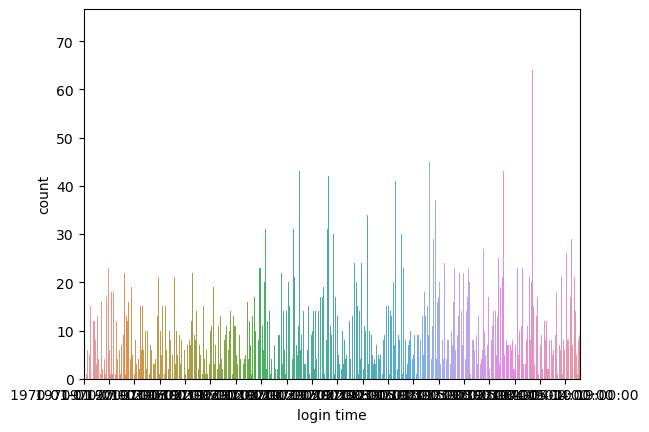

In [12]:
resampled_df['login_time'] = resampled_df['login_time'].astype(str)
fig = sns.barplot(x = 'login_time', y = 'count', data = resampled_df)
fig.set_xlabel("login time")
fig.set_ylabel("count")
fig.set_xticks(fig.get_xticks()[::500])
fig.set_xticklabels(fig.get_xticklabels()[::500], rotation = 45)

fig.show()
            